In [1]:
import sys
sys.path.insert(0, '..')

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from causalmodel.interference import Clustered
from causalmodel.utils.random_data import get_clustered_data

In [4]:
def one_trial():
    clusters_list = [5000, 5000, 2000]
    group_struct_list = [(2,), (3,), (5,)]
    tau = 1
    gamma = np.array((0.1,))
    Y, Z, X, cluster_labels, group_labels, ingroup_labels, _, _ = \
            get_clustered_data(clusters_list, group_struct_list, tau, gamma)
    c = Clustered(Y, Z, X, cluster_labels, group_labels, ingroup_labels)
    result = c.est_via_aipw()
    beta = result[0]['beta(g)'][:-1]
    se = result[0]['se'][:-1]
    rv = (beta - tau - gamma[0]*np.arange(len(se)))/se
    return rv

In [5]:
np.random.seed(42)
print(one_trial())

[0.99267249 1.08429342 1.20039008 1.32193735 1.51858812 0.        ]
[-0.33523892 -0.96515607  0.0155971   0.55415303  1.28574874]


In [4]:
def simulate(n=100):
    return list(zip(*[one_trial() for i in range(n)]))


def plot(z, title):
    fig = plt.figure(figsize=(5*len(z),3))
    for i, zs in enumerate(z):
        plt.subplot(1, len(z), i+1)
        plt.hist(zs, range=(-3,3), density=True, bins='auto')
        x = np.linspace(-3,3)
        pdf = norm.pdf(x)
        plt.plot(x,pdf)
        plt.title("tau({})".format(i))
    plt.suptitle(title, y=1)
    plt.show()

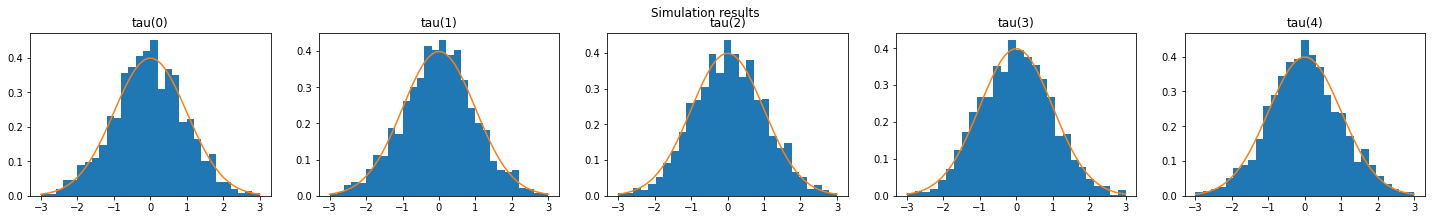

In [5]:
np.random.seed(42)
results = simulate(2000)
plot(results, "Simulation results")